# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 строк.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
music_genre = pd.read_csv('/content/drive/MyDrive/ВИМ/ПР2/music_genre.csv',na_values=['?'])
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris

#удалим неверные строки(duration = -1)
music_genre = music_genre.drop(np.where(music_genre['duration_ms'] < 0)[0])

#заменим empty_field на Nan
music_genre['artist_name']=music_genre['artist_name'].replace('empty_field', np.NaN)

# music_genre['duration_ms'].describe().to_frame()
music_genre=music_genre.sample(30000)
sns.set(style='whitegrid')


# sns.set()

Mounted at /content/drive


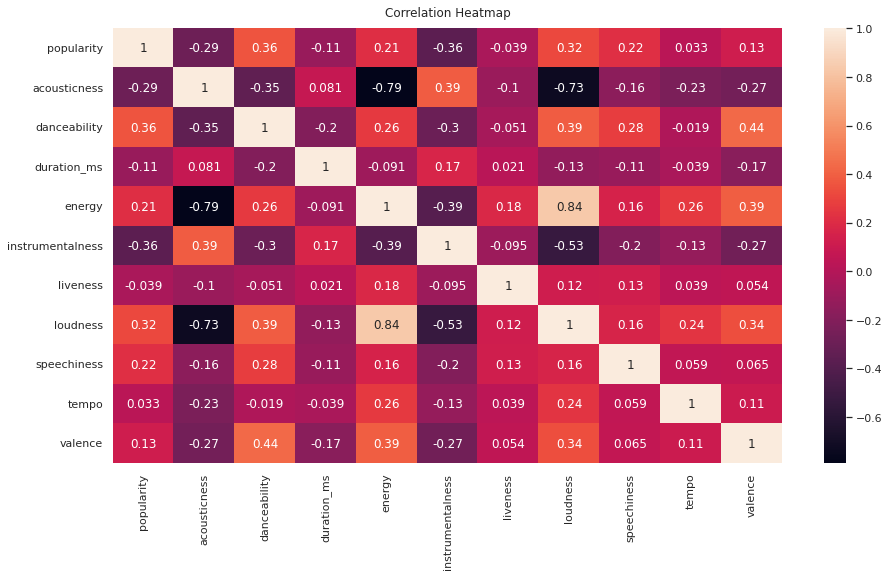

In [ ]:
music_genre[['instance_id',	'popularity',	'acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo','valence']].corr()


music_genre.corr()
music_genre_corr_map=sns.heatmap(music_genre[['popularity',	'acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo','valence']].corr(),annot=True);
music_genre_corr_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# music_genre[['popularity',	'acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo','valence']].corr()
# corr = music_genre[['instance_id',	'popularity',	'acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo','valence']].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#   ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)


**Вывод:** По данной корреляционной матрице можно увидеть,что наибольшой корряляцией обладает пара признаков loudness-energy, тогда как наибольшая отрицательная корреляция наблюдается у пары признаков energy-acousticness

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

In [ ]:
df=music_genre[['popularity',	'acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo','valence']].corr()

c = df.corr()

s = c.unstack()
s = s.drop_duplicates()
so = s.sort_values(kind="quicksort").to_frame().reset_index().head(3)





In [ ]:
!pip install --upgrade pandas

Text(0.5, 1.0, 'Корреляция между instrumentalness-loudness')

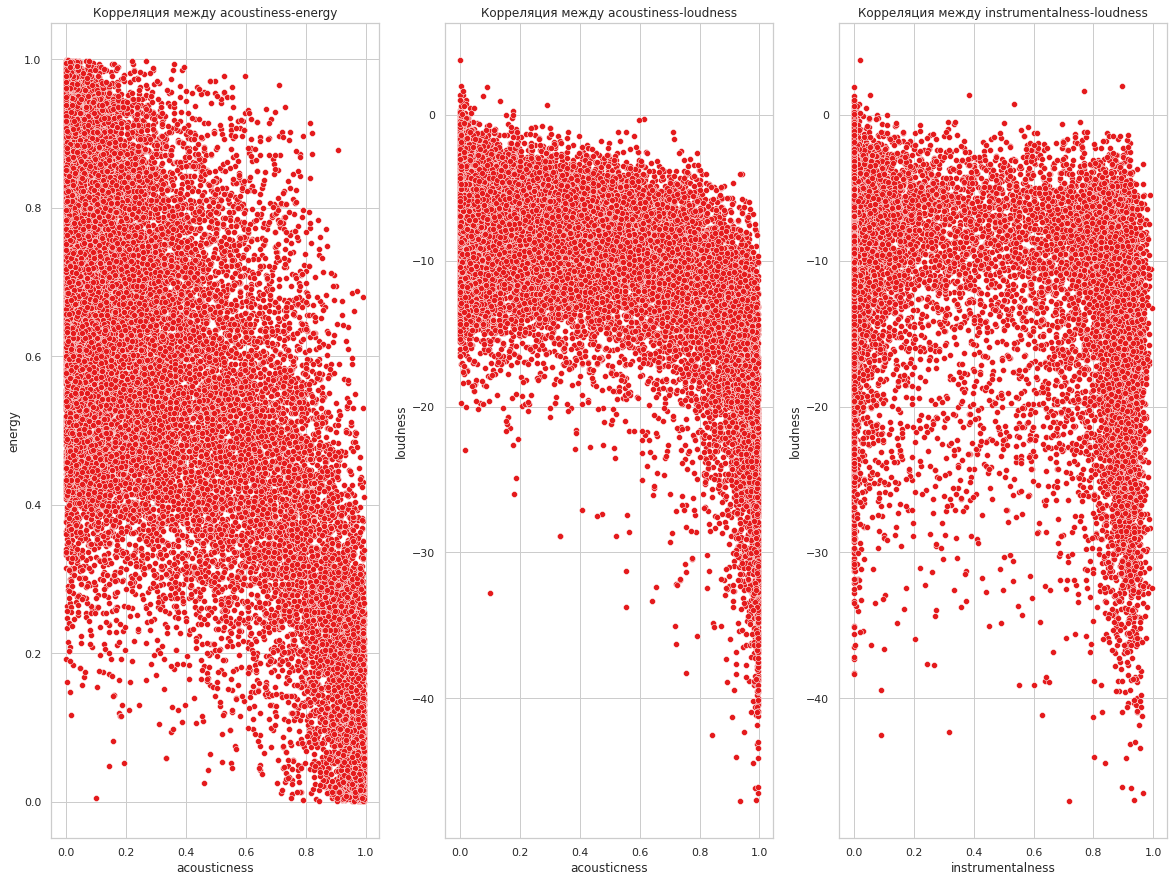

In [ ]:
sns.set_palette("Set1")
fig, axis = plt.subplots(1, 3, figsize=(20, 15))
sns.scatterplot(ax=axis[0], data=music_genre, x=so.at[0,'level_0'], y=so.at[0,"level_1"]).set_title('Корреляция между acoustiness-energy')
sns.scatterplot(ax=axis[1], data=music_genre, x=so.at[1,'level_0'], y=so.at[1,"level_1"]).set_title('Корреляция между acoustiness-loudness')
sns.scatterplot(ax=axis[2], data=music_genre, x=so.at[2,'level_0'], y=so.at[2,"level_1"]).set_title('Корреляция между instrumentalness-loudness')


**Вывод:** На данном графике мы можем увидеть соотношение признаков с наибольшей отрицательной корреляцией.

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

In [ ]:
genre=music_genre.groupby('music_genre')['instance_id'].count()
genre = genre.reset_index()

(2800.0, 3100.0)

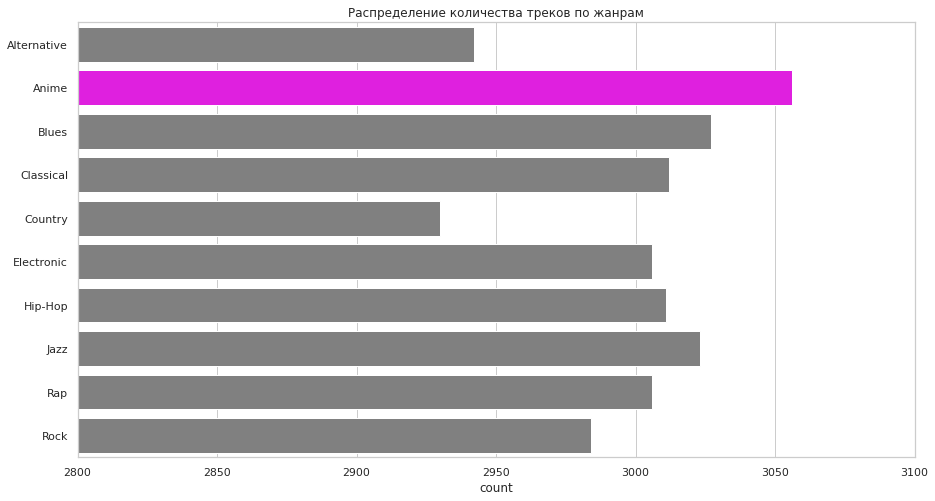

In [ ]:
labels = np.array(genre.music_genre)
values = np.array(genre.instance_id) 
clrs = ['gray' if (x < max(values)) else 'fuchsia' for x in values ]
#Configure the size
plt.figure(figsize=(15,8))
#barplot
sns.barplot(y=labels, x=values, palette=clrs).set_title('Распределение количества треков по жанрам') # color=clr
plt.xlabel("count");
plt.xlim(2800,3100)

**Вывод:** На данной диаграмме можно заметить, что самое большое количество треков наблюдается у жанра Jazz

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:

genre=genre.sort_values(by = 'instance_id', ascending=False)
artist=music_genre.groupby(['music_genre','artist_name'])['instance_id'].count().to_frame().reset_index()
 
#Топ 1 жанр


genre_1=genre.head(1)
genre_1=genre_1.merge(artist, how = 'left', left_on='music_genre', right_on='music_genre')
genre_1=genre_1.sort_values(by = 'instance_id_y', ascending=False).head(3)

#топ-2 жанр
genre_2=genre[1:2]
genre_2=genre_2.merge(artist, how = 'left', left_on='music_genre', right_on='music_genre')
genre_2=genre_2.sort_values(by = 'instance_id_y', ascending=False).head(3)

#топ-3 жанр
genre_3=genre[2:3]
genre_3=genre_3.merge(artist, how = 'left', left_on='music_genre', right_on='music_genre')
genre_3=genre_3.sort_values(by = 'instance_id_y', ascending=False).head(3)


genre_12=genre_1.merge(genre_2, how = 'outer')
genre_all=genre_12.merge(genre_3, how = 'outer')

fig = px.sunburst(genre_all, path=['music_genre', 'artist_name'], values='instance_id_y',title='Топ-3 жанры с группировкой топ-3 самых популярных исполнителей')
fig.show()


 **Вывод:** На данной диаграмме можно заметить топ-3 самый популярных жанра, причём разница состовляет примерно 30 треков.
 Жанр Blues имеет примерно три одиннаково популярных исполнителей.

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

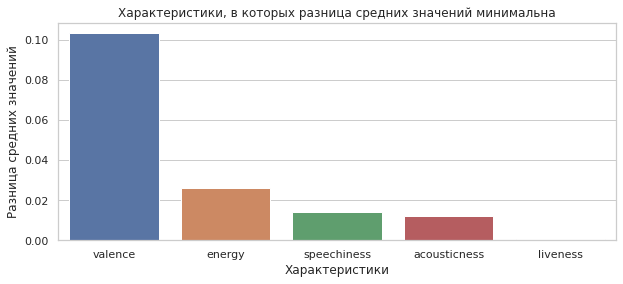

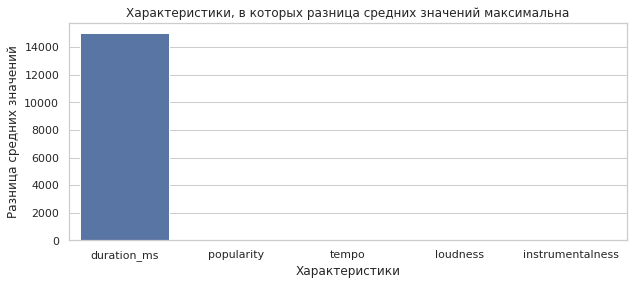

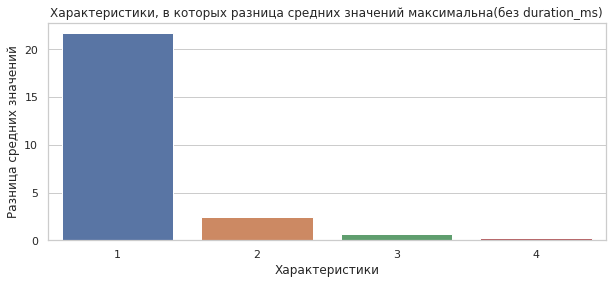

In [ ]:
genre_artist=music_genre.groupby('music_genre')['instance_id'].count().to_frame()
genre_artist.reset_index()


genre_top=genre_artist.sort_values(by = 'instance_id', ascending=False)
genre_top_first=genre_top.reset_index().head(1)

genre_top=genre_artist.sort_values(by = 'instance_id', ascending=True)
genre_top_last=genre_top.reset_index().head(1)


top_first=music_genre[music_genre['music_genre']==genre_top_first.at[0,'music_genre']]
top_first=top_first[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
top_last=music_genre[music_genre['music_genre']==genre_top_last.at[0,'music_genre']]
top_last=top_last[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
# table=top_last.merge(top_first, how = 'outer')
top_first_mean=top_first.mean().to_frame().reset_index()

top_last_mean=top_last.mean().to_frame().reset_index()
table=top_last_mean.merge(top_first_mean, how='left',left_on='index', right_on='index')
table['raznost']=(table['0_x']-table['0_y']).abs()

table=table.sort_values(by = 'raznost', ascending=False)
table_max=table.head(5)
table_min=table.tail(5)
table_min=table_min.set_index('index')
table_max=table_max.set_index('index')

df1 = pd.DataFrame(table_min)
# plt.bar(x=df.index, height=df.raznost, width=.7)
# plt.ylabel("count");
# fig, ax = plt.subplots()

fig, axis = plt.subplots(1, 1, figsize=(10, 4))
sns.barplot(x=df1.index, y=df1.raznost)
plt.xlabel("Характеристики");
plt.ylabel("Разница средних значений");
axis.set_title('Характеристики, в которых разница средних значений минимальна')


df2 = pd.DataFrame(table_max)
fig, axis = plt.subplots(1, 1, figsize=(10, 4))
sns.barplot(x=df2.index, y=df2.raznost)
plt.xlabel("Характеристики");
plt.ylabel("Разница средних значений");
axis.set_title('Характеристики, в которых разница средних значений максимальна')






table_max1=table_max.reset_index()
# table_max1=table_max1[1:5]


df3 = pd.DataFrame(table_max1[1:5])
fig, axis = plt.subplots(1, 1, figsize=(10, 4))
sns.barplot(x=df3.index, y=df3.raznost)
plt.xlabel("Характеристики");
plt.ylabel("Разница средних значений");
axis.set_title('Характеристики, в которых разница средних значений максимальна(без duration_ms)')

plt.show()



**Вывод:** При анализе характеристик, разница в которых была максимальна, было выявлено, что duration_ms обладает слишком большим значением по сравнению с остальными, поэтому было принято решение построить диаграмму, исключив данный столбец.

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

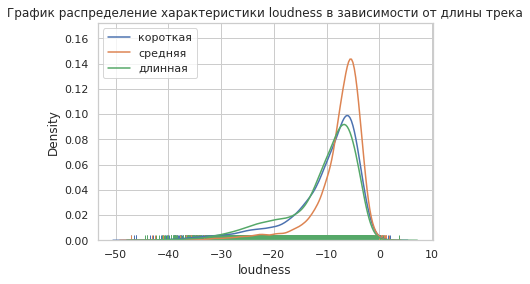

In [ ]:
def func(music_genre):
    if music_genre['duration_ms'] <= 1.904670e+05:
        return 'короткая'
    elif (music_genre['duration_ms'] >= 1.904670e+05) & (music_genre['duration_ms'] <= 2.756800e+05):
        return 'средняя' 
    else:
        return 'длинная'

music_genre['track_duration'] = music_genre.apply(func, axis=1)

duration_0 = music_genre.loc[music_genre['track_duration'] == 'короткая']
duration_1 = music_genre.loc[music_genre['track_duration'] == 'средняя']
duration_2 = music_genre.loc[music_genre['track_duration'] == 'длинная']

sns.distplot(duration_0[['loudness']], hist=False, rug=True)
sns.distplot(duration_1[['loudness']], hist=False, rug=True)
sns.distplot(duration_2[['loudness']], hist=False, rug=True)

plt.legend(labels=["короткая","средняя","длинная"])

plt.title('График распределение характеристики loudness в зависимости от длины трека')
plt.xlabel('loudness')
plt.ylabel('Density')

plt.show();
# sns.distplot(music_genre['loudness'],hist=False)

**Вывод:** Из данного графика можно заметить, что самая громкая музыка имеет среднюю длительность треков

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Text(0.5, 1.0, 'Отношение популярности треков к жанру')

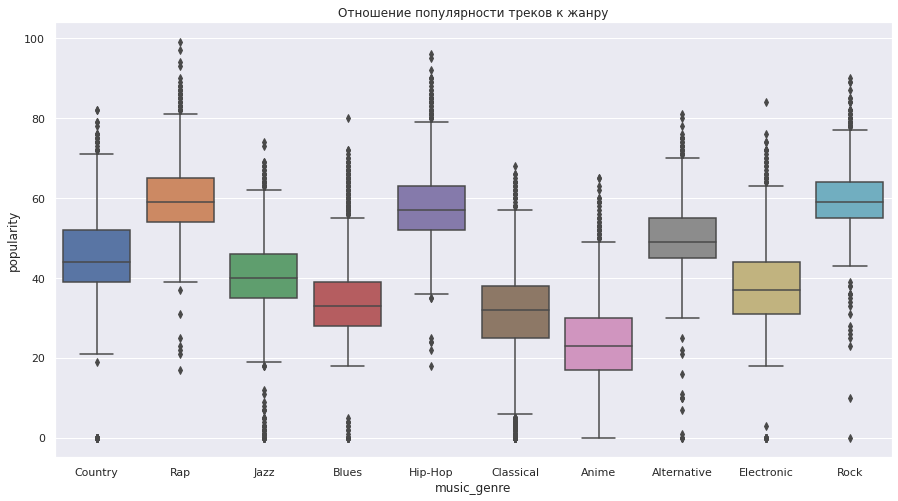

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='music_genre',
            y='popularity',
            data=music_genre).set_title('Отношение популярности треков к жанру')


**Вывод:** Данный график говорит нам о том, что Rock,Hip-hop и Rap обладают примерно одиннаковой популярностью, несколько большей, чем остальные жанры

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
ponchik=music_genre.groupby('track_duration')['instance_id'].count().to_frame()
ponchik=ponchik.reset_index()
ponchik




fig = px.pie(ponchik, names=ponchik.track_duration, values=ponchik.instance_id, labels=ponchik.track_duration, hole=.5,title='Численное соотношение треков разной длительности')
fig.show()

**Вывод:** Из данной диаграммы следует вывод, что треков средней длительности большинство

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
import pandas as pd
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
!pip install plotly==4.5

In [ ]:
import plotly.graph_objects as go

In [ ]:
! pip install --upgrade plotly 

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
!pip install country_converter
!pip install pycountry-convert

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = pd.read_csv('/content/drive/MyDrive/ВИМ/ПР2/directory.csv')
df1=directory

df1=df1['Country'].value_counts().to_frame().reset_index()
import pycountry_convert as pc
import country_converter as coco
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


def country_to_continent(country):
    country_continent_code = pc.country_alpha2_to_continent_code(country)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
    
for i in range(df1.shape[0]):
  df1['continent']=df1['index'].apply(country_to_continent)
  


df1['Country_name'] = df1['index'].apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
# df1 = df1.rename (columns= {'Country': 'Number of stores'})
# df1
df=df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fig = px.choropleth(df1, locations='Country_name', locationmode="country names",
                    color='Country', color_continuous_scale="tealrose",
                    scope="world", title="Распределение кофеен по всему миру")
fig.show()

**Вывод:** Данная карта показывает, что преимущественно кофейни расположены в США. Кроме того, можно заметить, что в целом данные кофейни распространены по всему миру.

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
import plotly.express as px
import numpy as np



fig = px.treemap(df1, path=[px.Constant("world"),'continent','Country_name'], values='Country',
                  color='Country', hover_data=['index'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df1['Country'], weights=df1['Country']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Вывод:** Данная диаграмма показывает, что наибольшее количество кофеен находится в США и соответственно в Северной Америке. Тогда как наименьшее - в Африке.